## Collatz conjecture

Consider the following operations on $n \in \mathbb{N}_0$:
* if $n$ is even, $n = n/2$,
* if $n$ is odd, $n = 3n + 1$.

The Collatz conjecture states that for any $n \in \mathbb{N}_0$, the seequence will eventually reach 1.  As the sequence starting from $n = 1$ is $1 \mapsto 4 \mapsto 2 \mapsto 1$, that means all sequences end in such cycles if the conjecture holds true.

## Requirements

In [21]:
import itertools
import matplotlib.pyplot as plt

## Collatz function

The `collatz` function computes the next value in the series.

In [3]:
def collatz(n: int) -> int:
    return n//2 if n % 2 == 0 else 3*n + 1

The following function applies the `collatz` function until it reaches a cycle, i.e., the sequence reaches 1.

In [4]:
def apply_collatz(n: int, max_iter: int = 1_000) -> None:
    for _ in range(max_iter):
        print(n)
        if n == 1:
            break
        n = collatz(n)

For example, for $n = 7$.

In [5]:
apply_collatz(7)

7
22
11
34
17
52
26
13
40
20
10
5
16
8
4
2
1


## Number of iterations

How long does it take given $n$ to reach 1?

In [6]:
def collatz_numbers(n: int, max_iter: int = 1_000) -> list[int]:
    numbers = []
    for _ in range(max_iter):
        numbers.append(n)
        if n == 1:
            break
        n = collatz(n)
    return numbers

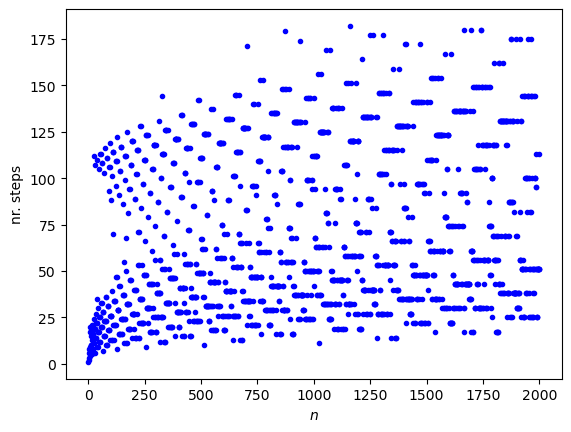

In [11]:
max_n = 2000
path_lengths = [
    len(collatz_numbers(n)) for n in range(1, max_n + 1)
]

plt.plot(list(range(1, max_n + 1)), path_lengths, 'b.')
plt.xlabel(r'$n$')
plt.ylabel('nr. steps');

## Reverse Collatz function

You can also map a number to the numbers it can have been generated from in the Collatz sequence.  For instance, the number 4 can either have originated from 1 since $3 \cdot 1 + 1 = 4$, or from 8 as $8/2 = 4$.  Note that the for instance the number 5 can have only been generated starting from 10 as $10/2 = 5$, and there is no way to write $3 \cdot n + 1 = 5$ for $n \in \mathbb{N}$.  Hence the reverse Collatz function will return either one or two integers.

In [17]:
def reverse_collatz(n: int) -> tuple[int] | tuple[int, int]:
    if (n - 1) % 3 == 0:
        return (n - 1)//3, 2*n
    else:
        return (2*n, )

In [13]:
reverse_collatz(4)

(1, 8)

In [18]:
reverse_collatz(5)

(10,)

You can check the numbers that are covered by this reverse Collatz function as it is applied to its own results repeatedly.

In [19]:
numbers_covered = set()
todo = [1]
while todo and len(numbers_covered) < 1000:
    value = todo.pop(0)
    for new_value in reverse_collatz(value):
        if new_value not in numbers_covered:
            numbers_covered.add(new_value)
            todo.append(new_value)

In [22]:
for number in itertools.islice(numbers_covered, 20):
    print(number)

0
1
2
3
4
5
6
4096
8
9
10
11
12
13
7
14
16
17
18
15


Are all numbers covered that are less than 100?

In [24]:
set(range(1, 101)) - numbers_covered

{31, 39, 47, 55, 57, 59, 62, 63, 67, 71, 73, 78, 79, 91, 94, 95, 97}

Clearly not, and those are likely numbers that yield a long sequence before reaching a cycle.

In [25]:
for number in set(range(1, 101)) - numbers_covered:
    print(f'{number:4d}: {len(collatz_numbers(number))}')

  97: 119
  67: 28
  39: 35
  71: 103
  73: 116
  91: 93
  78: 36
  47: 105
  79: 36
  94: 106
  95: 106
  55: 113
  57: 33
  59: 33
  63: 108
  62: 108
  31: 107
